In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
import pickle
import seaborn as sns

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopword=set(stopwords.words('english'))
df_twitter = pd.read_csv("twitter.csv")

In [4]:
df_twitter.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<AxesSubplot:xlabel='class', ylabel='count'>

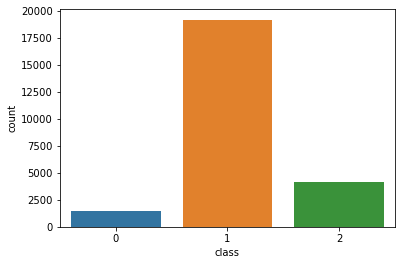

In [5]:
import seaborn as sns
sns.countplot(x='class', data=df_twitter)

In [6]:
df_twitter.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
90%,22774.800000,3.000000,1.000000,3.000000,3.000000,2.000000
95%,24034.900000,6.000000,2.000000,5.000000,3.000000,2.000000
99%,25041.180000,6.000000,3.000000,6.000000,3.000000,2.000000


In [7]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
df_twitter["labels"] = df_twitter["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
df_twitter

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [9]:
df_twitter = df_twitter[["tweet", "labels"]]
df_twitter

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_twitter["tweet"] = df_twitter["tweet"].apply(clean)

C:\Users\owner\AppData\Local\Temp\ipykernel_23596\3695096180.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter["tweet"] = df_twitter["tweet"].apply(clean)


In [11]:
df_twitter.head(5)

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language


In [12]:
x = np.array(df_twitter["tweet"])
y = np.array(df_twitter["labels"])
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
pickle.dump(cv, open('transform.pkl','wb'))

In [13]:
X

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197862 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# logistic regression
clf_logreg = LogisticRegression(max_iter=100000)

#KNN
clf_knn = KNeighborsClassifier(n_neighbors=4)

#SVM
clf_svm=SVC(probability=True)

#DecisionTree
clf_dectree = DecisionTreeClassifier()

#RandomForest
clf_randforest = RandomForestClassifier()


# fit model
clf_logreg.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_dectree.fit(X_train, y_train)
clf_randforest.fit(X_train, y_train)

RandomForestClassifier()

C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

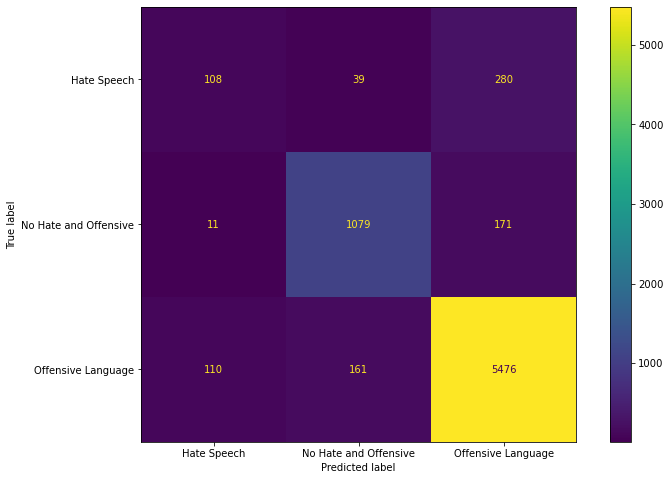

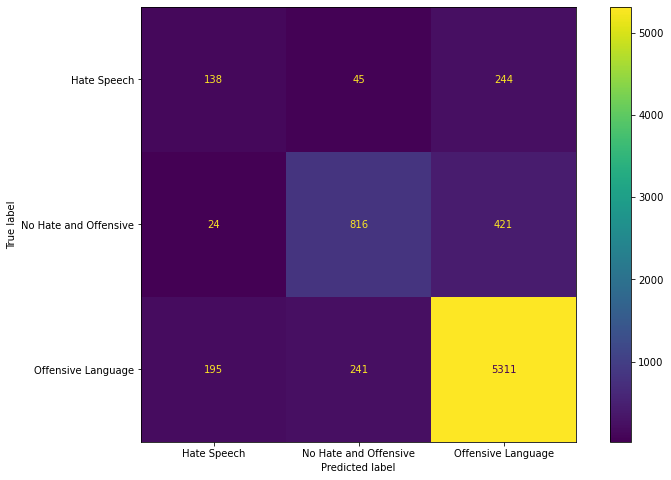

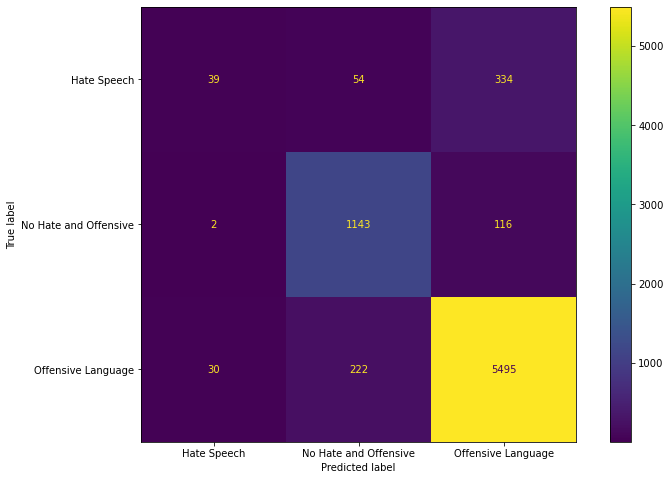

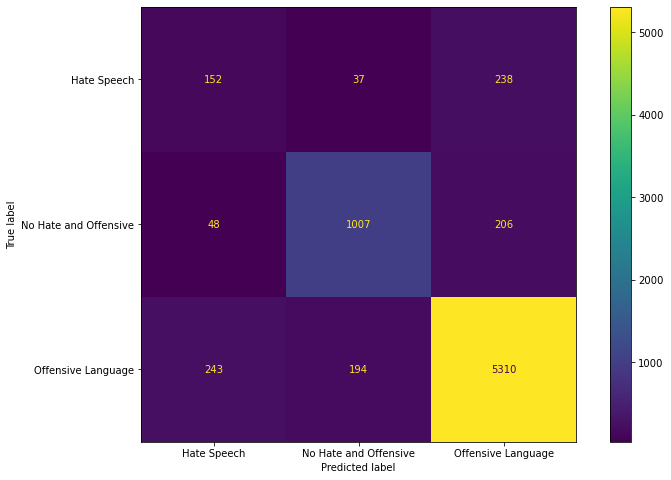

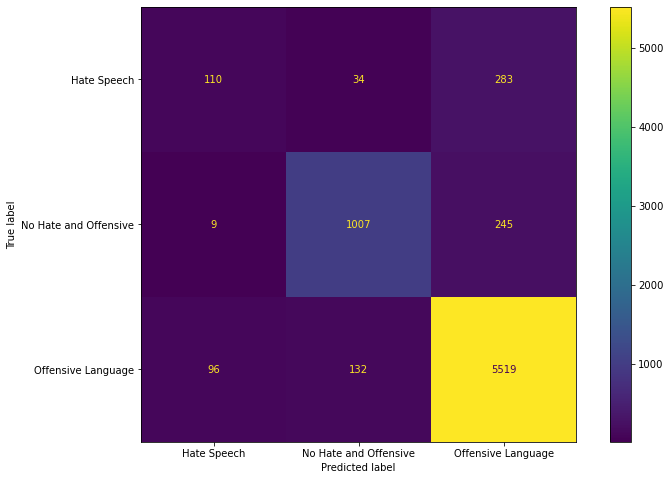

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
import pylab as pl
import pandas as pd
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

y_pred_logreg = clf_logreg.predict(X_test)
y_pred_knn = clf_knn.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)
y_pred_dectree = clf_dectree.predict(X_test)
y_pred_randforest = clf_randforest.predict(X_test)


acc_score_logreg=metrics.accuracy_score(y_test, y_pred_logreg)
acc_score_knn=metrics.accuracy_score(y_test, y_pred_knn)
acc_score_svm=metrics.accuracy_score(y_test, y_pred_svm)
acc_score_dectree=metrics.accuracy_score(y_test, y_pred_dectree)
acc_score_randforest=metrics.accuracy_score(y_test, y_pred_randforest)


confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(clf_logreg, X_test, y_test)

confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(clf_knn, X_test, y_test)

confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(clf_svm, X_test, y_test)

confusion_matrix(y_test, y_pred_dectree)
plot_confusion_matrix(clf_dectree, X_test, y_test)

confusion_matrix(y_test, y_pred_randforest)
plot_confusion_matrix(clf_randforest, X_test, y_test)


plt.show()

In [20]:
print("Logistic Regression Accuracy: ",acc_score_logreg)
print("KNN Accuracy: ",acc_score_knn)
print("SVM Accuracy: ",acc_score_svm)
print("Decision Tree Accuracy: ",acc_score_dectree)
print("Random Forest Accuracy: ",acc_score_randforest)

Logistic Regression Accuracy:  0.8961667787491594
KNN Accuracy:  0.8426361802286483
SVM Accuracy:  0.8980497646267653
Decision Tree Accuracy:  0.8700739744451916
Random Forest Accuracy:  0.8925353059852051


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_dectree))
print(classification_report(y_test, y_pred_randforest))

                       precision    recall  f1-score   support

          Hate Speech       0.47      0.25      0.33       427
No Hate and Offensive       0.84      0.86      0.85      1261
   Offensive Language       0.92      0.95      0.94      5747

             accuracy                           0.90      7435
            macro avg       0.75      0.69      0.71      7435
         weighted avg       0.88      0.90      0.89      7435

                       precision    recall  f1-score   support

          Hate Speech       0.39      0.32      0.35       427
No Hate and Offensive       0.74      0.65      0.69      1261
   Offensive Language       0.89      0.92      0.91      5747

             accuracy                           0.84      7435
            macro avg       0.67      0.63      0.65      7435
         weighted avg       0.83      0.84      0.84      7435

                       precision    recall  f1-score   support

          Hate Speech       0.55      0.09      

In [22]:
#Saving Models
pickle.dump(clf_logreg, open('model_logreg.pkl','wb'))
pickle.dump(clf_knn, open('model_knn.pkl','wb'))
pickle.dump(clf_svm, open('model_svm.pkl','wb'))
pickle.dump(clf_dectree, open('model_dectree.pkl','wb'))
pickle.dump(clf_randforest, open('model_randforest.pkl','wb'))